In [54]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

In [37]:
# Part 1
team_query = "SELECT Salaries.yearID, Salaries.teamID, Teams.franchID, sum(Salaries.Salary) as total_payroll, Teams.W as wins, Teams.G as games, (100.0*Teams.W/Teams.G) as win_rate FROM Salaries JOIN Teams on Teams.yearID = Salaries.yearID AND Salaries.teamID = Teams.teamID GROUP by 1,2"

df_teams = pd.read_sql(team_query, conn)
df_teams

,yearID,teamID,franchID,total_payroll,wins,games,win_rate
0,1985,ATL,ATL,14807000.0,66,162,40.740741
1,1985,BAL,BAL,11560712.0,83,161,51.552795
2,1985,BOS,BOS,10897560.0,81,163,49.693252
3,1985,CAL,ANA,14427894.0,90,162,55.555556
4,1985,CHA,CHW,9846178.0,85,163,52.147239
...,...,...,...,...,...,...,...
853,2014,SLN,STL,120693000.0,90,162,55.555556
854,2014,TBA,TBD,72689100.0,77,162,47.530864
855,2014,TEX,TEX,112255059.0,67,162,41.358025
856,2014,TOR,TOR,109920100.0,83,162,51.234568


The logic behind this code rests entirely in the SQL query used. Data was selected from two different tables, Salaries and Teams, and manipulated into the desired structure. The Teams table starts recording data from 1871 but the Salaries table starts recording data from 1985. So, in order to alleviate the missing data from Salaries that is in Teams, the first join was done where the rows had the same year. Then, another join was done where the rows had the same teamID since the data for each team isn't combined correctly and payroll data was messed up otherwise.

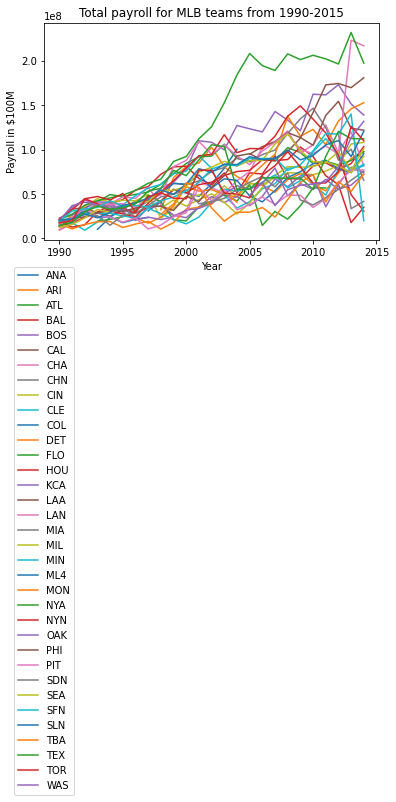

In [111]:
#Part 2
#problem 2
df_teams_1990 = df_teams[df_teams["yearID"] >= 1990]
payrolls = df_teams_1990.pivot(index = "yearID", columns = "teamID", values = "total_payroll")

payrolls.plot()
plt.legend(loc = 9, bbox_to_anchor=(0,-0.1))
plt.title("Total payroll for MLB teams from 1990-2015")
plt.xlabel("Year")
plt.ylabel("Payroll in $100M")
plt.show()

Data from years 1990-2014 of the df_teams dataframe from part 1 was first extracted, and then immediately pivot was called on it so that a new dataframe was created organized by year and teamID with the total_payroll data as values. This dataframe was then plotted and formatted, so that the axes had appropriate labels and the plot looked presentable. This plot shows payrolls of all the teams in the MLB from 1990-2014. The trend is clearly increasing in both average and spread. 

### Question 1
The payrolls overwhelming seem to trend up with time - the payroll data is heavily skewed right with time. The distribution also has a broad spread, with a fair amount of the data located away from the peak. Although, it does not have a guassian shape and instead resembles exponential growth. The variability is also quite high, since although the trend for most of the teams is increasing payrolls, the payrolls often experienced drawdowns from year to year. Finally, the different teams have increasing differences between their payrolls as time goes on, indicating increased inequality, and thus standard deviation in payroll totals over time.

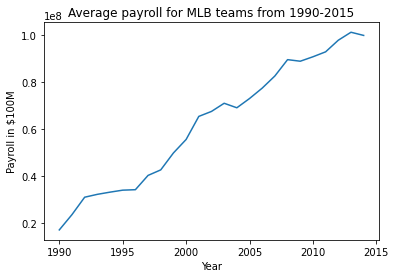

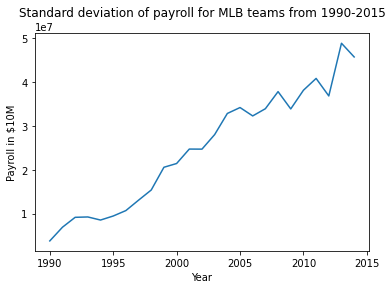

In [62]:
#Problem 3

#Mean payrolls over time
payrolls.mean(axis=1).plot()
plt.title("Average payroll for MLB teams from 1990-2015")
plt.xlabel("Year")
plt.ylabel("Payroll in $100M")
plt.show()

payrolls.std(axis=1).plot()
plt.title("Standard deviation of payroll for MLB teams from 1990-2015")
plt.xlabel("Year")
plt.ylabel("Payroll in $10M")
plt.show()

From the above plots, we can clearly see that both average payrolls and the standard deviation in payrolls have been continuously increasing over time, exactly as mentioned in the above part. These plots were generated by simply applying the mean and standard deviation functions to the rows, which finds the total average and standard deviation of all combined teams for that year. These arrays were then plotted and cleaned up.

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/2673494851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped["time_period"] = pd.cut(df_grouped["yearID"], bins = 5, labels = years)
/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/2673494851.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


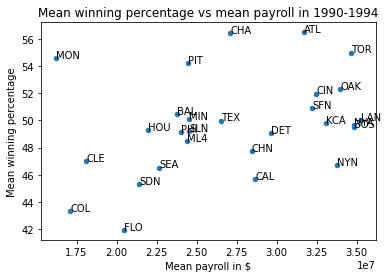

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/2673494851.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


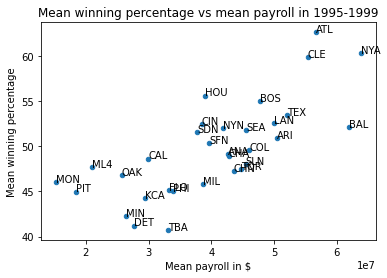

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/2673494851.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


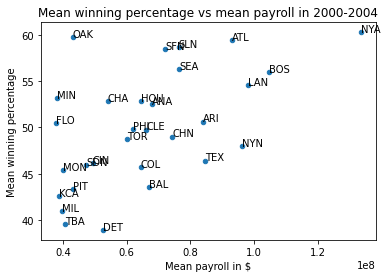

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/2673494851.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


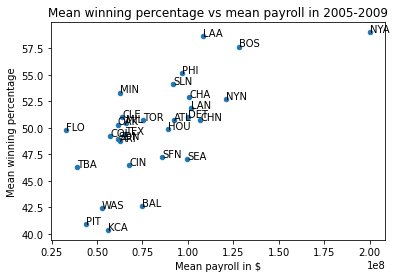

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/2673494851.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


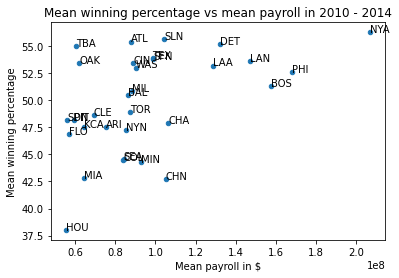

In [162]:
#Problem 4

df_grouped = df_teams_1990
years = ["1990-1994", "1995-1999", "2000-2004","2005-2009", "2010 - 2014"]
df_grouped["time_period"] = pd.cut(df_grouped["yearID"], bins = 5, labels = years)
binned = df_grouped.groupby("time_period")

i = 0
for df in binned:
    group = df[1].groupby('teamID').mean()
    group.plot.scatter(x="total_payroll", y= "win_rate")
    plt.title("Mean winning percentage vs mean payroll in " + years[i])
    plt.xlabel("Mean payroll in $")
    i+=1
    plt.ylabel("Mean winning percentage")
    
    group_df = pd.DataFrame(group)
    for idx, row in group_df.iterrows():
        plt.annotate(idx, (row['total_payroll'], row['win_rate']))
    
    plt.show()

The dataframe was then grouped by yearID into 5 bins, labelled by the years variable. Then the groupby object was iterated through, with a plot generated for each dataframe within it where the x-axis was the mean payroll and the y-axis was the mean winning percentage. Finally the points were labelled with the teamIDs. 

The plot generated showed the mean payroll vs mean winning percentage of each team over each defined five year period. It showed how the teams followed a general linear trend - more money spent meant higher winning percentages. There were some outliers, indicative of disproportionate winning percentage to payroll expenses.

### Question 2
There definitely seems to be a strong linear relationship between mean payroll and mean winning percentage in every time period - teams which spend more tend to win more. One outlier which consistently had the highest spending in every time period after 1995 was NYA - this team also consistently had one of the highest winning percentages in the league. However, ATL had a comparable win rate in most of the time periods, despite spending far less, so they were an outlier in terms of paying for wins in that regard. The teams all seemed to get more efficient at paying for wins after 1999, with each subsequent time period resulting in a noticeably higher and higher average ratio of win rate to payroll. The Oakland A's (OAK) were roughly in line with the average trend of win-rate to payroll ratio in the first two time periods, but then in 2000-2004 they had a noticeable jump, with one of the highest mean win-rates despite having one of the lowest mean payrolls in the league. In 2005-2009 we notice many teams catch up and OAK goes back to the average, but then in 2010-2014 we see that despite the average efficiency again increasing, OAK ascended to one of the highest efficiencies in the league, once again. 

In [139]:
#Part 3
#problem 5

years = df_teams_1990.groupby("yearID")
mean = years["total_payroll"].mean()
std = years["total_payroll"].std()

rows = []
for df in years:
    df[1]["standardized_payroll"] = (df[1]["total_payroll"] - mean[df[0]])/std[df[0]]
    rows.append(df[1])

std_payrolls = pd.concat(rows)
std_payrolls

,yearID,teamID,franchID,total_payroll,wins,games,win_rate,time_period,standardized_payroll
130,1990,ATL,ATL,14555501.0,65,162,40.123457,1990-1994,-0.667275
131,1990,BAL,BAL,9680084.0,76,161,47.204969,1990-1994,-1.959861
132,1990,BOS,BOS,20558333.0,88,162,54.320988,1990-1994,0.924213
133,1990,CAL,ANA,21720000.0,80,162,49.382716,1990-1994,1.232198
134,1990,CHA,CHW,9491500.0,94,162,58.024691,1990-1994,-2.009859
...,...,...,...,...,...,...,...,...,...
853,2014,SLN,STL,120693000.0,90,162,55.555556,2010 - 2014,0.457126
854,2014,TBA,TBD,72689100.0,77,162,47.530864,2010 - 2014,-0.593171
855,2014,TEX,TEX,112255059.0,67,162,41.358025,2010 - 2014,0.272509
856,2014,TOR,TOR,109920100.0,83,162,51.234568,2010 - 2014,0.221422


The payroll column of the dataframe was extracted and the mean and standard deviation of it were computed. The dataframe was grouped by year, and the groupby was iterated through, so that a new column was added with the standardized payroll. The payroll in that year was subtracted from the prior calculated average, then divided by the standard deviation. The rows were added to a list and then the list was concatenated into a dataframe. 

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/1848911864.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


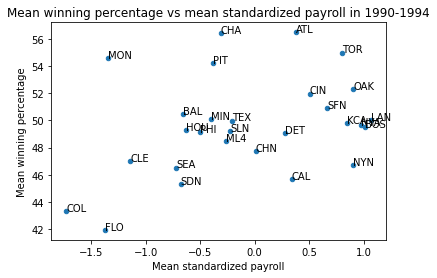

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/1848911864.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


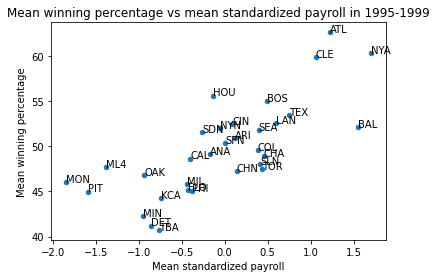

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/1848911864.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


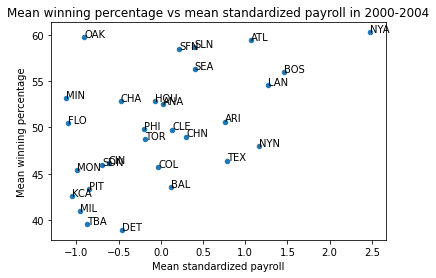

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/1848911864.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


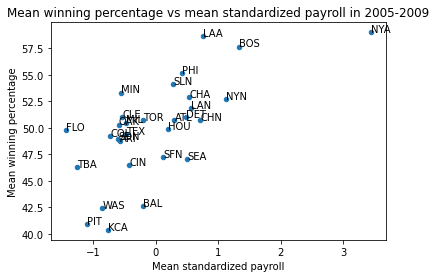

/var/folders/49/ggfcxcws3m54ppj9m6wxn8gw0000gn/T/ipykernel_17958/1848911864.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = df[1].groupby('teamID').mean()


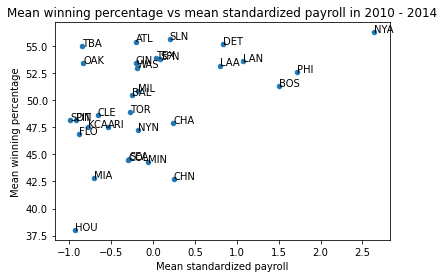

In [142]:
#Problem 6
df_grouped = std_payrolls
years = ["1990-1994", "1995-1999", "2000-2004","2005-2009", "2010 - 2014"]
df_grouped["time_period"] = pd.cut(df_grouped["yearID"], bins = 5, labels = years)
binned = df_grouped.groupby("time_period")

i = 0
for df in binned:
    group = df[1].groupby('teamID').mean()
    group.plot.scatter(x="standardized_payroll", y= "win_rate")
    plt.title("Mean winning percentage vs mean standardized payroll in " + years[i])
    plt.xlabel("Mean standardized payroll")
    i+=1
    plt.ylabel("Mean winning percentage")
    
    group_df = pd.DataFrame(group)
    for idx, row in group_df.iterrows():
        plt.annotate(idx, (row['standardized_payroll'], row['win_rate']))
    
    plt.show()

The code from problem 4 was largely reused, though the standardized dataframe and standardized payroll column were used instead. 

The plot is very similar with a similar conclusion, but the main difference is in the scale of the x-axis, making it easier to spot teams that were above/below average.

### Question 3
Once we standardized payrolls, the x-axis is centered at 0 and the mean of all the datapoints also becomes 0. Before standardization the x-axis was much larger and strictly positive, and thus was harder to interpret, but now any team to the right of 0 is easily identifiable as having above average payroll, and vice versa. Additionally, while the data points maintain the same shape, the spread is reduced (since the x-axis shrinks), so that the standard deviation is 1. Standardization reduced the difference in scale. 

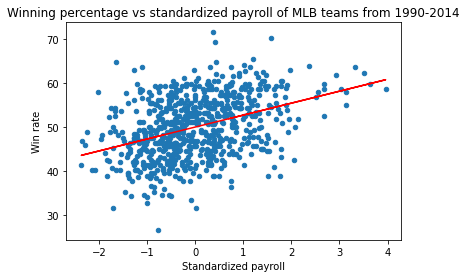

In [149]:
#Problem 7
std_payrolls.plot.scatter(x="standardized_payroll", y= "win_rate")
plt.title("Winning percentage vs standardized payroll of MLB teams from 1990-2014")
plt.xlabel("Standardized payroll")
plt.ylabel("Win rate")

m, b = np.polyfit(std_payrolls["standardized_payroll"], std_payrolls["win_rate"], 1)
plt.plot(std_payrolls["standardized_payroll"], m*std_payrolls["standardized_payroll"] + b, color = "red")

std_payrolls["exp_win_rate"] = 50 + 2.5*std_payrolls["standardized_payroll"]

plt.show()

A scatterplot was generated using the standardized payrolls dataframe, with standardized payrolls on the x-axis and the win-rate on the y-axis. The plot was labelled to make it presentable. A polyfit was generated using the standardized payroll and win rate, and the fit was chosen to be linear. This was then plotted using the standardized payroll as x and for y the standard linear equation mx+b, where m and b were found from polyfit and x was the standardized payroll. Finally, a new column was created with the expected win rate using the data from the standardized payroll column.

The plot is a scatterplot where each point was the win_rate vs standardized payroll for a given team in a given year. The plot shows that there is a clear positive linear relationship between standardized payroll and win rate. 

,yearID,teamID,franchID,total_payroll,wins,games,win_rate,time_period,standardized_payroll,exp_win_rate,efficiency
130,1990,ATL,ATL,14555501.0,65,162,40.123457,1990-1994,-0.667275,48.331811,-8.208354
131,1990,BAL,BAL,9680084.0,76,161,47.204969,1990-1994,-1.959861,45.100348,2.104621
132,1990,BOS,BOS,20558333.0,88,162,54.320988,1990-1994,0.924213,52.310533,2.010454
133,1990,CAL,ANA,21720000.0,80,162,49.382716,1990-1994,1.232198,53.080495,-3.697779
134,1990,CHA,CHW,9491500.0,94,162,58.024691,1990-1994,-2.009859,44.975353,13.049338
...,...,...,...,...,...,...,...,...,...,...,...
853,2014,SLN,STL,120693000.0,90,162,55.555556,2010 - 2014,0.457126,51.142816,4.412740
854,2014,TBA,TBD,72689100.0,77,162,47.530864,2010 - 2014,-0.593171,48.517072,-0.986208
855,2014,TEX,TEX,112255059.0,67,162,41.358025,2010 - 2014,0.272509,50.681273,-9.323248
856,2014,TOR,TOR,109920100.0,83,162,51.234568,2010 - 2014,0.221422,50.553554,0.681014


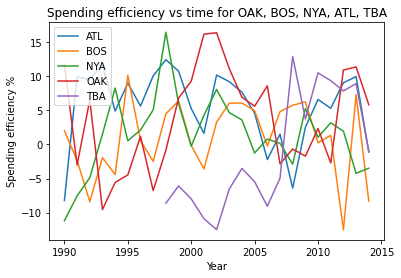

In [159]:
#Problem 8
std_payrolls["efficiency"] = std_payrolls["win_rate"] - std_payrolls["exp_win_rate"]
teams = std_payrolls.groupby("teamID")
whitelist = ["OAK", "BOS", "NYA", "ATL", "TBA"]

for df in teams:
    if(df[0] in whitelist):
        df[1].plot(x="yearID", y = "efficiency", label = df[0], ax=plt.gca())
        
plt.title("Spending efficiency vs time for OAK, BOS, NYA, ATL, TBA")
plt.xlabel("Year")
plt.ylabel("Spending efficiency %")
std_payrolls

An efficiency column was added to the dataframe by subtracting the expected win rate from the win rate. Then the teams were grouped by teamID, and this groupby was iterated over. If the team in the current iteration matched the team in the whitelist, the efficiency vs year was plotted, on the same axis, with an appropriate label. The plot was labelled and made professional. Finally the adjusted dataframe was then printed to show the changes made.

The plot shows the trend of spending efficiency over time for ATL, BOS, NYA, OAK, and TBA. The teams fluctuate in efficiency, though OAK has a noticeable increase during the Moneyball period before declining in the years following as other teams presumably caught up.

### Question 4
This plot provides a much more clear picture of the Oakland A's efficiency than the prior plots. It provides a more granular year-by-year view, so that we can see their efficiency was actually on the rise even before 2000. However, the conclusions drawn are pretty much the same. We can see that starting from 2000 for the next few years, their efficiency skyrocketed, indicative of the success of their Moneyball period. While it remained elevated, the other teams did catch up in the years following, but they were still able to prevent dips that were far below 0% spending efficiency. The spending efficiency did increase again after 2010. These findings agree with prior conclusions drawn, though the more granular breakdown does provide added insight into the year-to-year differences as well as more quantitative readings of efficiency within each year.